# Performance evaluation for various algorithms <a class="tocSkip">

In [1]:
import os
import io
import numpy 
from pandas import DataFrame
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import pyearth

In [2]:
def readFiles(path):
    for root,dirnames,filenames in os.walk(path):
        for filename in filenames:
            path=os.path.join(root,filename)
            
            inBody=False
            lines =[]
            f = io.open(path,'r',encoding='latin1')
            for line in f:
                if inBody:
                    lines.append(line)
                elif line=='\n':
                    inBody=True
            f.close()
            message = '\n'.join(lines)
            yield path,message    

In [3]:
def dataFrameFromDirectory(path,classification):
    rows =[]
    index=[]
    for filename,message in readFiles(path):
        rows.append({'message': message,'class': classification})
        index.append(filename)
        
    return DataFrame(rows,index=index)

# Train set

In [4]:
train = DataFrame({'message':[],'class':[]})
train

,message,class


In [5]:
train=train.append(dataFrameFromDirectory(r'C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\train\spam','spam'))
train=train.append(dataFrameFromDirectory(r'C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\train\ham','ham'))


C:\Users\Paul\.conda\envs\ml\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [6]:
print(train.shape)
train.head()

(603, 2)


,class,message
C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\train\spam\desktop.ini,spam,
C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\train\spam\spmsga140.txt,spam,"earn over $ 70 , 000 a month in your own home ..."
C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\train\spam\spmsga141.txt,spam,this message complies with the proposed united...
C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\train\spam\spmsga142.txt,spam,"make unlimited income no meetings , no phone c..."
C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\train\spam\spmsga143.txt,spam,are you ready to reach new prospects without t...


In [7]:
#remove empty emails (there are two because of google drive .ini files)
train=train.loc[train['message']!='']
print(train.shape)
train.head()

(601, 2)


,class,message
C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\train\spam\spmsga140.txt,spam,"earn over $ 70 , 000 a month in your own home ..."
C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\train\spam\spmsga141.txt,spam,this message complies with the proposed united...
C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\train\spam\spmsga142.txt,spam,"make unlimited income no meetings , no phone c..."
C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\train\spam\spmsga143.txt,spam,are you ready to reach new prospects without t...
C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\train\spam\spmsga144.txt,spam,* * * * * * warning ! this message is for porn...


## Vectorizer

In [8]:
vectorizer =  CountVectorizer(min_df=1,lowercase=True,analyzer='word', binary=False, decode_error='strict',token_pattern='(?u)\\b\\w\\w+\\b')
x_train = vectorizer.fit_transform(train['message'].values)

In [9]:
trainfrequencies=DataFrame(x_train.toarray(),columns=vectorizer.get_feature_names())
trainfrequencies.head()

,00,000,0000,0001,00014,000bp,001,00198,002656,0027,...,zukuenftigen,zulia,zulu,zur,zurich,zwart,zwarts,zweigenbaum,zwicky,zwischen
0,21,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y_train = train['class'].values

# Test set

In [11]:
test = DataFrame({'message':[],'class':[]})
test

,message,class


In [12]:
test=test.append(dataFrameFromDirectory(r'C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\test\spam','spam'))
test=test.append(dataFrameFromDirectory(r'C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\test\ham','ham'))

In [13]:
print(test.shape)
test.head()

(203, 2)


,class,message
C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\test\spam\desktop.ini,spam,
C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\test\spam\spmsga100.txt,spam,if you want the best hunting and camping vacat...
C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\test\spam\spmsga101.txt,spam,57 million email addresses for only $ 99 you w...
C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\test\spam\spmsga102.txt,spam,attention ! warning ! adults only ! warning ! ...
C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\test\spam\spmsga103.txt,spam,attention ! warning ! adults only ! warning ! ...


In [14]:
#remove empty emails (there are two because of google drive .ini files)
test=test.loc[test['message']!='']
print(test.shape)
test.head()

(201, 2)


,class,message
C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\test\spam\spmsga100.txt,spam,if you want the best hunting and camping vacat...
C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\test\spam\spmsga101.txt,spam,57 million email addresses for only $ 99 you w...
C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\test\spam\spmsga102.txt,spam,attention ! warning ! adults only ! warning ! ...
C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\test\spam\spmsga103.txt,spam,attention ! warning ! adults only ! warning ! ...
C:\Users\Paul\Documents\_SXOLH\Machine Learning\Projects\Project_4\Project_4__classification\Project 4 - classification\emailspam\test\spam\spmsga104.txt,spam,subject : re : are you in debt ? if you are th...


In [15]:
x_test = vectorizer.transform(test['message'].values)

In [16]:
testfrequencies=DataFrame(x_test.toarray(),columns=vectorizer.get_feature_names())
testfrequencies.head()

,00,000,0000,0001,00014,000bp,001,00198,002656,0027,...,zukuenftigen,zulia,zulu,zur,zurich,zwart,zwarts,zweigenbaum,zwicky,zwischen
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y_test = test['class'].values

# Top T features

Word frequency dataframe with classes

In [18]:
#reset index 
dat1=DataFrame(train['class'])
dat1.columns=['mailclass']
dat2=trainfrequencies

dat1 = dat1.reset_index(drop=True)
dat2 = dat2.reset_index(drop=True)

trainfrequenciesClass=pd.concat([dat1,dat2],axis=1)
trainfrequenciesClass

,mailclass,00,000,0000,0001,00014,000bp,001,00198,002656,...,zukuenftigen,zulia,zulu,zur,zurich,zwart,zwarts,zweigenbaum,zwicky,zwischen
0,spam,21,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,spam,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,spam,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,spam,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
sums=DataFrame(columns=vectorizer.get_feature_names(),index=['count'])
sums.loc['count']=trainfrequenciesClass.sum(axis=0)[1:]
sums

,00,000,0000,0001,00014,000bp,001,00198,002656,0027,...,zukuenftigen,zulia,zulu,zur,zurich,zwart,zwarts,zweigenbaum,zwicky,zwischen
count,728,840,1,2,3,1,1,4,1,1,...,1,1,1,2,2,1,3,1,4,1


In [20]:
#more than 50 count
sums=sums[sums>50]
sums=sums[sums.columns[~sums.isnull().all()]]
sums

,00,000,10,100,11,12,13,14,15,16,...,written,www,year,years,yes,yet,you,your,yours,yourself
count,728,840,559,344,170,156,70,93,255,104,...,51,271,148,180,75,52,5592,2364,70,74


In [21]:
topwordslist=list(sums.columns)

#remove numbers
no_integers = [item for item in topwordslist if not item.isdigit()]
topwordslist=no_integers

topwordslist

['3d',
 'able',
 'about',
 'above',
 'abstract',
 'abstracts',
 'ac',
 'accepted',
 'access',
 'account',
 'acl',
 'acquisition',
 'action',
 'actually',
 'ad',
 'add',
 'additional',
 'address',
 'addresses',
 'ads',
 'adult',
 'advertise',
 'advertisement',
 'advertising',
 'after',
 'again',
 'against',
 'all',
 'allow',
 'allows',
 'almost',
 'along',
 'already',
 'also',
 'always',
 'am',
 'amazing',
 'american',
 'amount',
 'an',
 'analysis',
 'and',
 'another',
 'answer',
 'any',
 'anyone',
 'anything',
 'anywhere',
 'aol',
 'applications',
 'approach',
 'approaches',
 'april',
 'are',
 'area',
 'around',
 'artificial',
 'as',
 'ask',
 'asked',
 'aspects',
 'assume',
 'at',
 'august',
 'author',
 'authors',
 'available',
 'away',
 'back',
 'bank',
 'based',
 'basis',
 'be',
 'because',
 'become',
 'been',
 'before',
 'being',
 'believe',
 'below',
 'best',
 'better',
 'between',
 'big',
 'bills',
 'bonus',
 'book',
 'both',
 'box',
 'break',
 'bring',
 'build',
 'bulk',
 'busine

## Ham word sums

In [22]:
hamfrequencies=trainfrequenciesClass.loc[trainfrequenciesClass['mailclass']=='ham']
hamfrequencies.shape

(301, 20940)

In [23]:
hamsums=DataFrame(columns=vectorizer.get_feature_names(),index=['hamwordcount'])
hamsums.loc['hamwordcount']=hamfrequencies.sum(axis=0)[1:]
hamsums

,00,000,0000,0001,00014,000bp,001,00198,002656,0027,...,zukuenftigen,zulia,zulu,zur,zurich,zwart,zwarts,zweigenbaum,zwicky,zwischen
hamwordcount,277,41,0,2,3,1,1,4,1,1,...,1,1,1,2,2,1,3,1,4,1


In [24]:
#how many emails included each word
hamsums.loc['hamemails']=hamfrequencies.astype(bool).sum(axis=0)
hamsums

,00,000,0000,0001,00014,000bp,001,00198,002656,0027,...,zukuenftigen,zulia,zulu,zur,zurich,zwart,zwarts,zweigenbaum,zwicky,zwischen
hamwordcount,277,41,0,2,3,1,1,4,1,1,...,1,1,1,2,2,1,3,1,4,1
hamemails,37,12,0,1,2,1,1,2,1,1,...,1,1,1,2,2,1,3,1,2,1


In [25]:
#more than 50 count
topham = hamsums[hamsums.columns.intersection(topwordslist)]
topham

,3d,able,about,above,abstract,abstracts,ac,accepted,access,account,...,written,www,year,years,yes,yet,you,your,yours,yourself
hamwordcount,0,28,242,58,104,101,136,59,38,41,...,42,131,35,45,19,36,372,114,2,2
hamemails,0,27,113,44,56,47,51,36,18,26,...,30,58,24,25,12,26,114,50,2,1


## Spam word sums

In [26]:
spamfrequencies=trainfrequenciesClass.loc[trainfrequenciesClass['mailclass']=='spam']
spamfrequencies.shape

(300, 20940)

In [27]:
spamsums=DataFrame(columns=vectorizer.get_feature_names(),index=['spamwordcount'])
spamsums.loc['spamwordcount']=spamfrequencies.sum(axis=0)[1:]
spamsums

,00,000,0000,0001,00014,000bp,001,00198,002656,0027,...,zukuenftigen,zulia,zulu,zur,zurich,zwart,zwarts,zweigenbaum,zwicky,zwischen
spamwordcount,451,799,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#how many emails included each word
spamsums.loc['spamemails']=spamfrequencies.astype(bool).sum(axis=0)
spamsums

,00,000,0000,0001,00014,000bp,001,00198,002656,0027,...,zukuenftigen,zulia,zulu,zur,zurich,zwart,zwarts,zweigenbaum,zwicky,zwischen
spamwordcount,451,799,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
spamemails,94,93,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#more than 50 count
topspam = spamsums[spamsums.columns.intersection(topwordslist)]
topspam

,3d,able,about,above,abstract,abstracts,ac,accepted,access,account,...,written,www,year,years,yes,yet,you,your,yours,yourself
spamwordcount,718,62,374,63,0,0,17,13,49,59,...,9,140,113,135,56,16,5220,2250,68,72
spamemails,16,41,118,54,0,0,7,13,38,31,...,9,79,57,64,42,13,264,221,48,55


## Joined in one dataframe

In [30]:
SpamandHamSums=pd.concat([topspam,topham],sort=False)
SpamandHamSums=SpamandHamSums.fillna(0)
SpamandHamSums

,3d,able,about,above,abstract,abstracts,ac,accepted,access,account,...,written,www,year,years,yes,yet,you,your,yours,yourself
spamwordcount,718,62,374,63,0,0,17,13,49,59,...,9,140,113,135,56,16,5220,2250,68,72
spamemails,16,41,118,54,0,0,7,13,38,31,...,9,79,57,64,42,13,264,221,48,55
hamwordcount,0,28,242,58,104,101,136,59,38,41,...,42,131,35,45,19,36,372,114,2,2
hamemails,0,27,113,44,56,47,51,36,18,26,...,30,58,24,25,12,26,114,50,2,1


In [31]:
totalwordcount=SpamandHamSums.loc['hamwordcount'] + SpamandHamSums.loc['spamwordcount']
totalemailcount=SpamandHamSums.loc['hamemails'] + SpamandHamSums.loc['spamemails']
SpamandHamSums.loc['totalWordCount']=totalwordcount
SpamandHamSums.loc['totalEmailCount']=totalemailcount
SpamandHamSums

,3d,able,about,above,abstract,abstracts,ac,accepted,access,account,...,written,www,year,years,yes,yet,you,your,yours,yourself
spamwordcount,718,62,374,63,0,0,17,13,49,59,...,9,140,113,135,56,16,5220,2250,68,72
spamemails,16,41,118,54,0,0,7,13,38,31,...,9,79,57,64,42,13,264,221,48,55
hamwordcount,0,28,242,58,104,101,136,59,38,41,...,42,131,35,45,19,36,372,114,2,2
hamemails,0,27,113,44,56,47,51,36,18,26,...,30,58,24,25,12,26,114,50,2,1
totalWordCount,718,90,616,121,104,101,153,72,87,100,...,51,271,148,180,75,52,5592,2364,70,74
totalEmailCount,16,68,231,98,56,47,58,49,56,57,...,39,137,81,89,54,39,378,271,50,56


In [32]:
eps=0.000000001 #to avoid divide by zero

pSpam = SpamandHamSums.loc['spamemails'] / trainfrequencies.shape[0]  #proportion of spam mails over all mails for each word
pHam = SpamandHamSums.loc['hamemails'] / trainfrequencies.shape[0]   #proportion of ham mails over all mails for each word

entropy = -pSpam*np.log2(pSpam + eps) - pHam*np.log2(pHam + eps)
entropy = np.round(entropy,decimals=2)
SpamandHamSums.loc['entropy']=entropy
SpamandHamSums

,3d,able,about,above,abstract,abstracts,ac,accepted,access,account,...,written,www,year,years,yes,yet,you,your,yours,yourself
spamwordcount,718.00,62.00,374.00,63.00,0.00,0.00,17.00,13.00,49.0,59.00,...,9.00,140.00,113.00,135.00,56.00,16.00,5220.00,2250.00,68.00,72.00
spamemails,16.00,41.00,118.00,54.00,0.00,0.00,7.00,13.00,38.0,31.00,...,9.00,79.00,57.00,64.00,42.00,13.00,264.00,221.00,48.00,55.00
hamwordcount,0.00,28.00,242.00,58.00,104.00,101.00,136.00,59.00,38.0,41.00,...,42.00,131.00,35.00,45.00,19.00,36.00,372.00,114.00,2.00,2.00
hamemails,0.00,27.00,113.00,44.00,56.00,47.00,51.00,36.00,18.0,26.00,...,30.00,58.00,24.00,25.00,12.00,26.00,114.00,50.00,2.00,1.00
totalWordCount,718.00,90.00,616.00,121.00,104.00,101.00,153.00,72.00,87.0,100.00,...,51.00,271.00,148.00,180.00,75.00,52.00,5592.00,2364.00,70.00,74.00
totalEmailCount,16.00,68.00,231.00,98.00,56.00,47.00,58.00,49.00,56.0,57.00,...,39.00,137.00,81.00,89.00,54.00,39.00,378.00,271.00,50.00,56.00
entropy,0.14,0.47,0.91,0.59,0.32,0.29,0.38,0.36,0.4,0.42,...,0.31,0.71,0.51,0.53,0.38,0.32,0.98,0.83,0.32,0.33


In [33]:
totalemailproportion=(SpamandHamSums.loc['spamemails'] + SpamandHamSums.loc['hamemails'])/trainfrequencies.shape[0]
totalemailproportion=np.round(totalemailproportion,decimals=2)
SpamandHamSums.loc['totalemailproportion']=totalemailproportion
SpamandHamSums

,3d,able,about,above,abstract,abstracts,ac,accepted,access,account,...,written,www,year,years,yes,yet,you,your,yours,yourself
spamwordcount,718.00,62.00,374.00,63.00,0.00,0.00,17.00,13.00,49.00,59.00,...,9.00,140.00,113.00,135.00,56.00,16.00,5220.00,2250.00,68.00,72.00
spamemails,16.00,41.00,118.00,54.00,0.00,0.00,7.00,13.00,38.00,31.00,...,9.00,79.00,57.00,64.00,42.00,13.00,264.00,221.00,48.00,55.00
hamwordcount,0.00,28.00,242.00,58.00,104.00,101.00,136.00,59.00,38.00,41.00,...,42.00,131.00,35.00,45.00,19.00,36.00,372.00,114.00,2.00,2.00
hamemails,0.00,27.00,113.00,44.00,56.00,47.00,51.00,36.00,18.00,26.00,...,30.00,58.00,24.00,25.00,12.00,26.00,114.00,50.00,2.00,1.00
totalWordCount,718.00,90.00,616.00,121.00,104.00,101.00,153.00,72.00,87.00,100.00,...,51.00,271.00,148.00,180.00,75.00,52.00,5592.00,2364.00,70.00,74.00
totalEmailCount,16.00,68.00,231.00,98.00,56.00,47.00,58.00,49.00,56.00,57.00,...,39.00,137.00,81.00,89.00,54.00,39.00,378.00,271.00,50.00,56.00
entropy,0.14,0.47,0.91,0.59,0.32,0.29,0.38,0.36,0.40,0.42,...,0.31,0.71,0.51,0.53,0.38,0.32,0.98,0.83,0.32,0.33
totalemailproportion,0.03,0.11,0.38,0.16,0.09,0.08,0.10,0.08,0.09,0.09,...,0.06,0.23,0.13,0.15,0.09,0.06,0.63,0.45,0.08,0.09


In [34]:
#we will select only words that are in at least 4 % of all e-mails.
#if a word appears in just a few mails ,it wont be that significant
indexes=np.where(SpamandHamSums.loc['totalemailproportion']>=0.04)[0]
SignificantWords=SpamandHamSums.iloc[:,indexes]
SignificantWords

,able,about,above,abstract,abstracts,ac,accepted,access,account,acquisition,...,written,www,year,years,yes,yet,you,your,yours,yourself
spamwordcount,62.00,374.00,63.00,0.00,0.00,17.00,13.00,49.00,59.00,0.00,...,9.00,140.00,113.00,135.00,56.00,16.00,5220.00,2250.00,68.00,72.00
spamemails,41.00,118.00,54.00,0.00,0.00,7.00,13.00,38.00,31.00,0.00,...,9.00,79.00,57.00,64.00,42.00,13.00,264.00,221.00,48.00,55.00
hamwordcount,28.00,242.00,58.00,104.00,101.00,136.00,59.00,38.00,41.00,89.00,...,42.00,131.00,35.00,45.00,19.00,36.00,372.00,114.00,2.00,2.00
hamemails,27.00,113.00,44.00,56.00,47.00,51.00,36.00,18.00,26.00,40.00,...,30.00,58.00,24.00,25.00,12.00,26.00,114.00,50.00,2.00,1.00
totalWordCount,90.00,616.00,121.00,104.00,101.00,153.00,72.00,87.00,100.00,89.00,...,51.00,271.00,148.00,180.00,75.00,52.00,5592.00,2364.00,70.00,74.00
totalEmailCount,68.00,231.00,98.00,56.00,47.00,58.00,49.00,56.00,57.00,40.00,...,39.00,137.00,81.00,89.00,54.00,39.00,378.00,271.00,50.00,56.00
entropy,0.47,0.91,0.59,0.32,0.29,0.38,0.36,0.40,0.42,0.26,...,0.31,0.71,0.51,0.53,0.38,0.32,0.98,0.83,0.32,0.33
totalemailproportion,0.11,0.38,0.16,0.09,0.08,0.10,0.08,0.09,0.09,0.07,...,0.06,0.23,0.13,0.15,0.09,0.06,0.63,0.45,0.08,0.09


In [35]:
smartSignificance=(1-SignificantWords.loc['entropy'])*SignificantWords.loc['totalemailproportion']
smartSignificance=np.round(smartSignificance*100,decimals=2)
SignificantWords.loc['smartSignificance']=smartSignificance
SignificantWords

C:\Users\Paul\.conda\envs\ml\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,able,about,above,abstract,abstracts,ac,accepted,access,account,acquisition,...,written,www,year,years,yes,yet,you,your,yours,yourself
spamwordcount,62.00,374.00,63.00,0.00,0.00,17.00,13.00,49.00,59.00,0.00,...,9.00,140.00,113.00,135.00,56.00,16.00,5220.00,2250.00,68.00,72.00
spamemails,41.00,118.00,54.00,0.00,0.00,7.00,13.00,38.00,31.00,0.00,...,9.00,79.00,57.00,64.00,42.00,13.00,264.00,221.00,48.00,55.00
hamwordcount,28.00,242.00,58.00,104.00,101.00,136.00,59.00,38.00,41.00,89.00,...,42.00,131.00,35.00,45.00,19.00,36.00,372.00,114.00,2.00,2.00
hamemails,27.00,113.00,44.00,56.00,47.00,51.00,36.00,18.00,26.00,40.00,...,30.00,58.00,24.00,25.00,12.00,26.00,114.00,50.00,2.00,1.00
totalWordCount,90.00,616.00,121.00,104.00,101.00,153.00,72.00,87.00,100.00,89.00,...,51.00,271.00,148.00,180.00,75.00,52.00,5592.00,2364.00,70.00,74.00
totalEmailCount,68.00,231.00,98.00,56.00,47.00,58.00,49.00,56.00,57.00,40.00,...,39.00,137.00,81.00,89.00,54.00,39.00,378.00,271.00,50.00,56.00
entropy,0.47,0.91,0.59,0.32,0.29,0.38,0.36,0.40,0.42,0.26,...,0.31,0.71,0.51,0.53,0.38,0.32,0.98,0.83,0.32,0.33
totalemailproportion,0.11,0.38,0.16,0.09,0.08,0.10,0.08,0.09,0.09,0.07,...,0.06,0.23,0.13,0.15,0.09,0.06,0.63,0.45,0.08,0.09
smartSignificance,5.83,3.42,6.56,6.12,5.68,6.20,5.12,5.40,5.22,5.18,...,4.14,6.67,6.37,7.05,5.58,4.08,1.26,7.65,5.44,6.03


## Most significant words

In [36]:
#TOP 10
top=SignificantWords.loc['smartSignificance'].sort_values(ascending=False)[0:9]
top

language       12.90
linguistics    12.50
university     11.10
remove         10.45
free           10.23
languages       9.72
money           9.12
papers          9.12
click           8.85
Name: smartSignificance, dtype: float64

In [37]:
SignificantWords['click']

spamwordcount           157.00
spamemails               89.00
hamwordcount              0.00
hamemails                 0.00
totalWordCount          157.00
totalEmailCount          89.00
entropy                   0.41
totalemailproportion      0.15
smartSignificance         8.85
Name: click, dtype: float64

It actually looks like a decent measure in our opinion.

# Suggested features

We suggest three extra features.  

* Message size  
* Count of words 
* Occurrences of obvious spam words coming from an external dictionary.

In [38]:
calls_to_action="“act now“; “apply now“; “buy now“; “click below“; “click here“; “click me to download“; “click this link“; “click to remove“; “call free“; “call now“; “claim now“; “contact us immediately“; “get now“; “sign up free“; “shop now“; “order now“; “get paid”"
calls_to_action=calls_to_action.replace("“","")
calls_to_action=calls_to_action.replace("”","")
cta_list=calls_to_action.split(';')
cta_list

['act now',
 ' apply now',
 ' buy now',
 ' click below',
 ' click here',
 ' click me to download',
 ' click this link',
 ' click to remove',
 ' call free',
 ' call now',
 ' claim now',
 ' contact us immediately',
 ' get now',
 ' sign up free',
 ' shop now',
 ' order now',
 ' get paid']

In [39]:
money_and_finance="“$$$“; “£££“; “accounts“; “additional income“; “bank“; “bonus“; “cash“; “cost“; “credit“; “earn“; “earn $“; “earn money“; “earn per week“; “finance”; “financial advice“; “financial freedom”; “free investment”; “get your money”; “insurance“; “investment”; “investment advice”; “investment decision”; “invoice”, “lowest price”, “make £“, “make money“; “million“; “money“; “money back“; “nominated bank account“; “potential earnings“; “profit“; “refund“; “risk free“; “save“; “save $“; “stock alert“; “thousands“; “US Dollars”"
money_and_finance=money_and_finance.replace("“","")
money_and_finance=money_and_finance.replace("”","")
maf_list=money_and_finance.split(';')
maf_list

['$$$',
 ' £££',
 ' accounts',
 ' additional income',
 ' bank',
 ' bonus',
 ' cash',
 ' cost',
 ' credit',
 ' earn',
 ' earn $',
 ' earn money',
 ' earn per week',
 ' finance',
 ' financial advice',
 ' financial freedom',
 ' free investment',
 ' get your money',
 ' insurance',
 ' investment',
 ' investment advice',
 ' investment decision',
 ' invoice, lowest price, make £, make money',
 ' million',
 ' money',
 ' money back',
 ' nominated bank account',
 ' potential earnings',
 ' profit',
 ' refund',
 ' risk free',
 ' save',
 ' save $',
 ' stock alert',
 ' thousands',
 ' US Dollars']

In [40]:
marketing="“ad“; “amazing“; “bargain“; “beneficial offer“; “cheap“; “clearance“; “congratulations“; “”dear“; “direct marketing“; “don’t delete“; “email marketing“; “fantastic“; “free“; “free trial” (+ many other phrases containing free, so please avoid); “gift certificate“; “increase sales“; “increase traffic“; “internet marketing“; “junk“; “marketing“; “marketing solution“; “member“; “message from“; “month trial offer“; “off everything“; “offer“; “offer expires“; “offer extended“; “online marketing“; “opportunity“; “opt in“; “performance“; “promise you“; “sale“; “search engine optimisation“; “spam“; “special promotion”; “stop further distribution“; “subscribe“; “super promo“; “the following form“; “this isn’t junk“; “this isn’t spam“; “top urgent“; “unbeatable offer“; “unsubscribe“; “urgent“; “urgent response“; “visit our website“; “web traffic“; “win“; “winner”"
marketing=marketing.replace("“","")
marketing=marketing.replace("”","")
m_list=marketing.split(';')
m_list

['ad',
 ' amazing',
 ' bargain',
 ' beneficial offer',
 ' cheap',
 ' clearance',
 ' congratulations',
 ' dear',
 ' direct marketing',
 ' don’t delete',
 ' email marketing',
 ' fantastic',
 ' free',
 ' free trial (+ many other phrases containing free, so please avoid)',
 ' gift certificate',
 ' increase sales',
 ' increase traffic',
 ' internet marketing',
 ' junk',
 ' marketing',
 ' marketing solution',
 ' member',
 ' message from',
 ' month trial offer',
 ' off everything',
 ' offer',
 ' offer expires',
 ' offer extended',
 ' online marketing',
 ' opportunity',
 ' opt in',
 ' performance',
 ' promise you',
 ' sale',
 ' search engine optimisation',
 ' spam',
 ' special promotion',
 ' stop further distribution',
 ' subscribe',
 ' super promo',
 ' the following form',
 ' this isn’t junk',
 ' this isn’t spam',
 ' top urgent',
 ' unbeatable offer',
 ' unsubscribe',
 ' urgent',
 ' urgent response',
 ' visit our website',
 ' web traffic',
 ' win',
 ' winner']

In [41]:
online_bussiness="“additional income“; “be your own boss“; “extra income“; “free hosting“; “get paid“; “home based business“; “home employment“; “income from home“; “profit“; “sale“; “work at home“; “work from home“; “while you sleep”"
online_bussiness=online_bussiness.replace("“","")
online_bussiness=online_bussiness.replace("”","")
ob_list=online_bussiness.split(';')
ob_list

['additional income',
 ' be your own boss',
 ' extra income',
 ' free hosting',
 ' get paid',
 ' home based business',
 ' home employment',
 ' income from home',
 ' profit',
 ' sale',
 ' work at home',
 ' work from home',
 ' while you sleep']

In [42]:
spam_word_list= cta_list + maf_list + m_list + ob_list
spam_word_list

['act now',
 ' apply now',
 ' buy now',
 ' click below',
 ' click here',
 ' click me to download',
 ' click this link',
 ' click to remove',
 ' call free',
 ' call now',
 ' claim now',
 ' contact us immediately',
 ' get now',
 ' sign up free',
 ' shop now',
 ' order now',
 ' get paid',
 '$$$',
 ' £££',
 ' accounts',
 ' additional income',
 ' bank',
 ' bonus',
 ' cash',
 ' cost',
 ' credit',
 ' earn',
 ' earn $',
 ' earn money',
 ' earn per week',
 ' finance',
 ' financial advice',
 ' financial freedom',
 ' free investment',
 ' get your money',
 ' insurance',
 ' investment',
 ' investment advice',
 ' investment decision',
 ' invoice, lowest price, make £, make money',
 ' million',
 ' money',
 ' money back',
 ' nominated bank account',
 ' potential earnings',
 ' profit',
 ' refund',
 ' risk free',
 ' save',
 ' save $',
 ' stock alert',
 ' thousands',
 ' US Dollars',
 'ad',
 ' amazing',
 ' bargain',
 ' beneficial offer',
 ' cheap',
 ' clearance',
 ' congratulations',
 ' dear',
 ' direct m

## Train

In [43]:
import sys

#obvious spam word count , count of words and size of message feature creation

obvious_spam_train=np.zeros(train['message'].shape[0])
count_of_words_train=np.zeros(train['message'].shape[0])
size_of_message_train=np.zeros(train['message'].shape[0])

for i,message in zip(range(train['message'].shape[0]),train['message']):
    totaloccurrences=0
    for word in spam_word_list:
        if word in message:
            occurrences=message.count(word)
            #print(word,occurrences)
            totaloccurrences+=occurrences
     
    obvious_spam_train[i]=totaloccurrences
    count_of_words_train[i]=len(message.split())
    size_of_message_train[i]=sys.getsizeof(message)

## Test

In [44]:
#obvious spam word count , count of words and size of message feature creation

obvious_spam_test=np.zeros(test['message'].shape[0])
count_of_words_test=np.zeros(test['message'].shape[0])
size_of_message_test=np.zeros(test['message'].shape[0])

for i,message in zip(range(test['message'].shape[0]),test['message']):
    totaloccurrences=0
    for word in spam_word_list:
        if word in message:
            occurrences=message.count(word)
            #print(word,occurrences)
            totaloccurrences+=occurrences
     
    obvious_spam_test[i]=totaloccurrences
    count_of_words_test[i]=len(message.split())
    size_of_message_test[i]=sys.getsizeof(message)

## Accuracy with suggested features

In [45]:
#TRY WITH NEW FEATURES.OLD ACC WAS 0.965

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

T=20

#TOP T FEATURES
top=SignificantWords.loc['smartSignificance'].sort_values(ascending=False)[0:T]
newtestfrequencies=testfrequencies[top.keys()]
newtrainfrequencies=trainfrequencies[top.keys()]


#newtrainfrequencies.insert(loc=0,column='obvious_spam',value=obvious_spam_train)
#newtestfrequencies.insert(loc=0,column='obvious_spam',value=obvious_spam_test)

#newtrainfrequencies.insert(loc=0,column='count of words',value=count_of_words_train)
#newtestfrequencies.insert(loc=0,column='count of words',value=count_of_words_test)

#newtrainfrequencies.insert(loc=0,column='message size',value=size_of_message_train)
#newtestfrequencies.insert(loc=0,column='message size',value=size_of_message_test)


#x_train  y_train
message_train=np.array(newtrainfrequencies)
spam_nospam_train=y_train

#x_test  y_test
message_test=np.array(newtestfrequencies)
spam_nospam_test=y_test


#KNN model
Spam_model = KNeighborsClassifier(n_neighbors=3)
Spam_model.fit(message_train, spam_nospam_train)

pred = Spam_model.predict(message_test)
accuracy_score(spam_nospam_test,pred)

0.9651741293532339

Accuracy seems to have dropped.

# Evaluation of algorithms

We will use the top 20 features for every algorithm just to keep the comparison somewhat consistent.Different algorithms may behave differently with other choices of T (number of top features used).  

We might do a comparison of the "best" cases later on but it won't be a huge difference from what we have seen.

In [46]:
from sklearn.metrics import accuracy_score

T=20

#TOP T FEATURES
top=SignificantWords.loc['smartSignificance'].sort_values(ascending=False)[0:T]
newtestfrequencies=testfrequencies[top.keys()]
newtrainfrequencies=trainfrequencies[top.keys()]

#x_train  y_train
x_train=np.array(newtrainfrequencies)
y_train=y_train #just for aesthetics

#x_test  y_test
x_test=np.array(newtestfrequencies)
y_test=y_test #just for aesthetics

In [148]:
scores=[] #we will save accuracies here
names=[] #we will save algorithm names here

# CART

In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100)
clf_gini.fit(x_train, y_train)

y_pred = clf_gini.predict(x_test)

clf_gini_accuracy_score = accuracy_score(y_test,y_pred)
clf_gini_accuracy_score

0.9651741293532339

In [149]:
scores.append(clf_gini_accuracy_score)
names.append("CART")

# Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression model
Spam_model = LogisticRegression(solver='liblinear', penalty='l1')
Spam_model.fit(x_train, y_train)

pred = Spam_model.predict(x_test)

logistic_regr_accuracy_score=accuracy_score(y_test,pred)
logistic_regr_accuracy_score

0.9701492537313433

In [150]:
scores.append(logistic_regr_accuracy_score)
names.append("Logistic Regression")

# kNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier


#KNN model
Spam_model = KNeighborsClassifier(n_neighbors=3)
Spam_model.fit(x_train, y_train)

pred = Spam_model.predict(x_test)

knn_accuracy_score=accuracy_score(y_test,pred)
knn_accuracy_score

0.9651741293532339

In [151]:
scores.append(knn_accuracy_score)
names.append("kNN (n=3)")

# Linear Regression

In [85]:
#convert string classes to numeric types
y_train_numeric=pd.DataFrame(y_train)
y_test_numeric=pd.DataFrame(y_test)

mapping = {'spam': 1, 'ham': 0}

y_train_numeric=y_train_numeric.applymap(lambda s: mapping.get(s) if s in mapping else s)
y_test_numeric=y_test_numeric.applymap(lambda s: mapping.get(s) if s in mapping else s)

#y_test_numeric.head()

In [86]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train_numeric)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

#pd.DataFrame(y_pred).head()

In [87]:
#assign 1 to values greater than or equal to 0.5 and 0 to less than 0.5
y_pred=np.where(y_pred>=0.5, 1, y_pred)
y_pred=np.where(y_pred<0.5, 0, y_pred)
#pd.DataFrame(y_pred).head()

In [88]:
linear_regr_accuracy_score=accuracy_score(y_test_numeric,y_pred)
linear_regr_accuracy_score

0.8905472636815921

In [152]:
scores.append(linear_regr_accuracy_score)
names.append("Linear Regression")

# MARS

https://www.depends-on-the-definition.com/multivariate-adaptive-regression-splines/  

https://www.youtube.com/watch?v=17QbQF__9XM&t=283s

In [99]:
from pyearth import Earth

# Fit an Earth model
model = Earth(verbose=True) # initializing py- earth package

# making model for the data
model.fit(x_train, y_train_numeric)

# Print the model
print(model.trace())
print(model.summary())

Beginning forward pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.249999  1      0.251  0.000  0.000  
1     0       1    568   0.197598  3      0.202  0.210  0.196  
2     0       3    119   0.167616  5      0.174  0.330  0.307  
3     0       0    565   0.148293  7      0.157  0.407  0.376  
4     0       4    228   0.137508  9      0.148  0.450  0.411  
5     0       8    89    0.128472  11     0.140  0.486  0.440  
6     0       13   503   0.122446  13     0.136  0.510  0.457  
7     0       11   213   0.119406  15     0.135  0.522  0.461  
8     0       12   115   0.116800  17     0.135  0.533  0.464  
9     0       18   -1    0.114417  18     0.133  0.542  0.470  
10    0       2    -1    0.112816  19     0.132  0.549  0.473  
11    0       5    -1    0.111908  20     0.132  0.552  0.472  
12    0       15 

C:\Users\Paul\.conda\envs\ml\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()


4     29  32     0.10  0.138  0.583  0.450  
5     11  31     0.10  0.137  0.583  0.455  
6     27  30     0.10  0.135  0.583  0.460  
7     9   29     0.10  0.134  0.582  0.465  
8     35  28     0.10  0.133  0.582  0.469  
9     16  27     0.10  0.132  0.581  0.473  
10    5   26     0.10  0.131  0.580  0.477  
11    23  25     0.11  0.130  0.579  0.480  
12    34  24     0.11  0.130  0.577  0.482  
13    25  23     0.11  0.129  0.574  0.484  
14    7   22     0.11  0.129  0.572  0.486  
15    3   21     0.11  0.129  0.569  0.487  
16    32  20     0.11  0.128  0.566  0.488  
17    30  19     0.11  0.128  0.565  0.491  
18    20  18     0.11  0.128  0.561  0.491  
19    19  17     0.11  0.127  0.557  0.492  
20    28  16     0.11  0.127  0.554  0.492  
21    26  15     0.11  0.128  0.548  0.490  
22    21  14     0.11  0.128  0.544  0.491  
23    22  13     0.11  0.127  0.542  0.493  
24    18  12     0.12  0.128  0.535  0.489  
25    1   11     0.12  0.129  0.528  0.486  
26    13  

C:\Users\Paul\.conda\envs\ml\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


In [100]:
# Plot the model
y_pred = model.predict(x_test)


#assign 1 to values greater than or equal to 0.5 and 0 to less than 0.5
y_pred=np.where(y_pred>=0.5, 1, y_pred)
y_pred=np.where(y_pred<0.5, 0, y_pred)

mars_accuracy_score=accuracy_score(y_test_numeric,y_pred)
mars_accuracy_score

0.9104477611940298

In [153]:
scores.append(mars_accuracy_score)
names.append("MARS")

# Naive Bayes

In [101]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(x_train,y_train)

predictions=classifier.predict(x_test)

naive_bayes_accuracy_score=accuracy_score(y_test,predictions)
naive_bayes_accuracy_score

0.9751243781094527

In [154]:
scores.append(naive_bayes_accuracy_score)
names.append("Naive Bayes")

# Neural Network

In [102]:
#hyperparameters
eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)

n_hidden_neurons=3
epochs=10

In [103]:
from sklearn.neural_network import MLPClassifier



# store models for later use
DNN_scikit = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)


for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        dnn = MLPClassifier(hidden_layer_sizes=(n_hidden_neurons), activation='logistic',
                            alpha=lmbd, learning_rate_init=eta, max_iter=epochs)
        dnn.fit(x_train, y_train)
        
        DNN_scikit[i][j] = dnn
        
        print("Learning rate  = ", eta)
        print("Lambda = ", lmbd)
        print("Accuracy score on test set: ", dnn.score(x_test, y_test))
        print()

Learning rate  =  1e-05
Lambda =  1e-05
Accuracy score on test set:  0.4527363184079602

Learning rate  =  1e-05
Lambda =  0.0001
Accuracy score on test set:  0.48258706467661694

Learning rate  =  1e-05
Lambda =  0.001
Accuracy score on test set:  0.4975124378109453

Learning rate  =  1e-05
Lambda =  0.01
Accuracy score on test set:  0.3681592039800995

Learning rate  =  1e-05
Lambda =  0.1
Accuracy score on test set:  0.5074626865671642

Learning rate  =  1e-05
Lambda =  1.0
Accuracy score on test set:  0.4975124378109453

Learning rate  =  1e-05
Lambda =  10.0
Accuracy score on test set:  0.5024875621890548

Learning rate  =  0.0001
Lambda =  1e-05
Accuracy score on test set:  0.5074626865671642

Learning rate  =  0.0001
Lambda =  0.0001
Accuracy score on test set:  0.5024875621890548

Learning rate  =  0.0001
Lambda =  0.001
Accuracy score on test set:  0.4975124378109453

Learning rate  =  0.0001
Lambda =  0.01
Accuracy score on test set:  0.7512437810945274

Learning rate  =  0.0

C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_it

Accuracy score on test set:  0.5024875621890548

Learning rate  =  0.001
Lambda =  0.01
Accuracy score on test set:  0.746268656716418

Learning rate  =  0.001
Lambda =  0.1
Accuracy score on test set:  0.5024875621890548

Learning rate  =  0.001
Lambda =  1.0
Accuracy score on test set:  0.5422885572139303

Learning rate  =  0.001
Lambda =  10.0
Accuracy score on test set:  0.4975124378109453

Learning rate  =  0.01
Lambda =  1e-05
Accuracy score on test set:  0.945273631840796

Learning rate  =  0.01
Lambda =  0.0001
Accuracy score on test set:  0.8855721393034826

Learning rate  =  0.01
Lambda =  0.001
Accuracy score on test set:  0.9552238805970149

Learning rate  =  0.01
Lambda =  0.01
Accuracy score on test set:  0.7960199004975125

Learning rate  =  0.01
Lambda =  0.1
Accuracy score on test set:  0.8159203980099502

Learning rate  =  0.01
Lambda =  1.0
Accuracy score on test set:  0.5024875621890548

Learning rate  =  0.01
Lambda =  10.0
Accuracy score on test set:  0.5273631840

C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_it

Accuracy score on test set:  0.5024875621890548

Learning rate  =  0.1
Lambda =  10.0
Accuracy score on test set:  0.5024875621890548

Learning rate  =  1.0
Lambda =  1e-05
Accuracy score on test set:  0.9651741293532339

Learning rate  =  1.0
Lambda =  0.0001
Accuracy score on test set:  0.9552238805970149

Learning rate  =  1.0
Lambda =  0.001
Accuracy score on test set:  0.9651741293532339

Learning rate  =  1.0
Lambda =  0.01
Accuracy score on test set:  0.9751243781094527

Learning rate  =  1.0
Lambda =  0.1
Accuracy score on test set:  0.9303482587064676

Learning rate  =  1.0
Lambda =  1.0
Accuracy score on test set:  0.5024875621890548

Learning rate  =  1.0
Lambda =  10.0
Accuracy score on test set:  0.4975124378109453

Learning rate  =  10.0
Lambda =  1e-05
Accuracy score on test set:  0.9502487562189055

Learning rate  =  10.0
Lambda =  0.0001
Accuracy score on test set:  0.9104477611940298

Learning rate  =  10.0
Lambda =  0.001
Accuracy score on test set:  0.84577114427860

C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_it

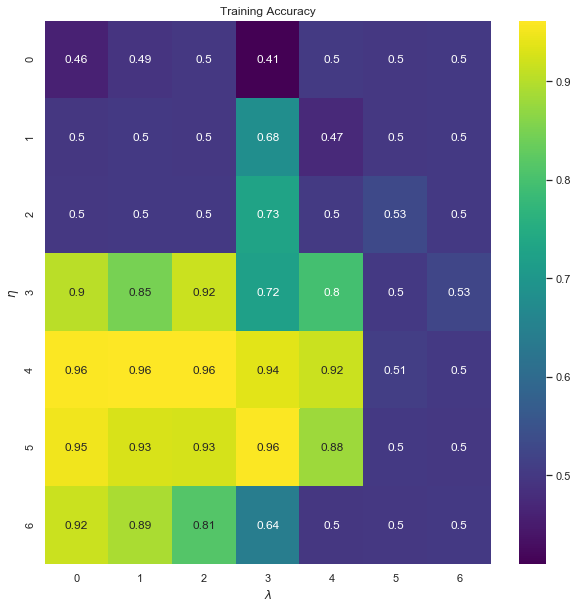

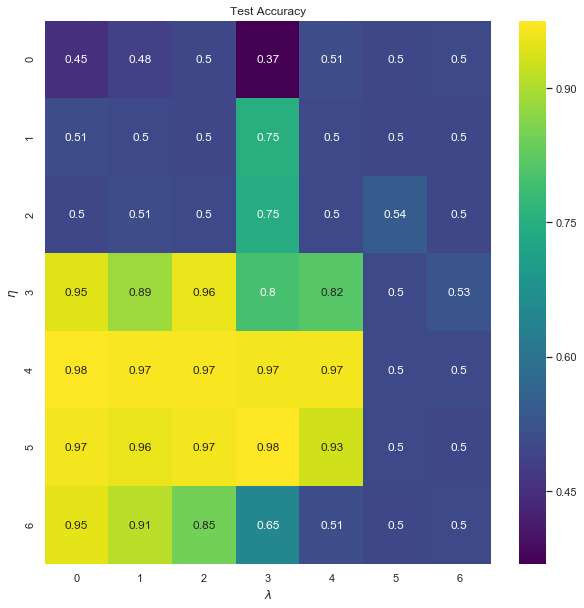

In [104]:
# optional
# visual representation of grid search
# uses seaborn heatmap, could probably do this in matplotlib
import seaborn as sns
from matplotlib import pyplot as plt


sns.set()

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        dnn = DNN_scikit[i][j]
        
        train_pred = dnn.predict(x_train) 
        test_pred = dnn.predict(x_test)

        train_accuracy[i][j] = accuracy_score(y_train, train_pred)
        test_accuracy[i][j] = accuracy_score(y_test, test_pred)

        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

In [109]:
neural_network=DNN_scikit[5][3]

pred = neural_network.predict(x_test)

dnn_accuracy_score = accuracy_score(y_test, pred)
dnn_accuracy_score

0.9751243781094527

In [155]:
scores.append(dnn_accuracy_score)
names.append("Neural Network")

# Comparison

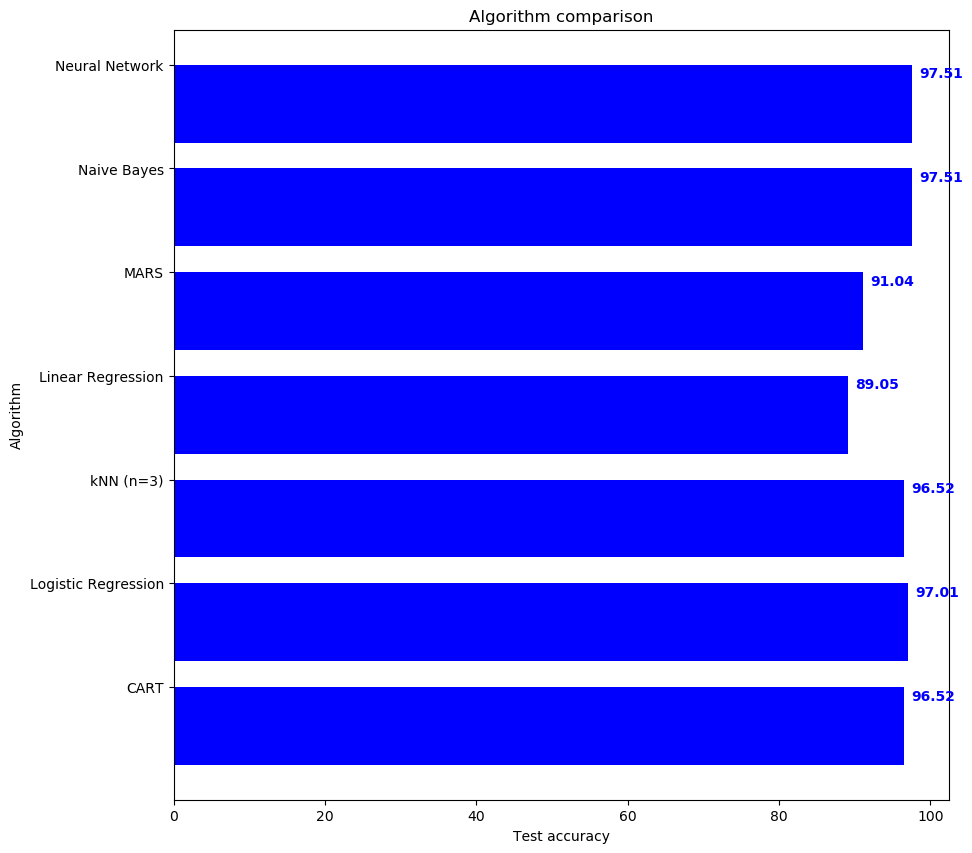

In [199]:
import os
import numpy as np
import matplotlib.pyplot as plt


x = names
y = [i * 100 for i in scores]
y = [ '%.2f' % elem for elem in y ]
y = [float(i) for i in y]


fig, ax = plt.subplots(figsize=(10,10))    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Algorithm comparison')
plt.xlabel('Test accuracy')
plt.ylabel('Algorithm')

for i, v in enumerate(y):
    ax.text(v + 1, i + .25, str(v), color='blue', fontweight='bold')
#plt.show()

## Using different number of features / top words

C:\Users\Paul\.conda\envs\ml\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\Paul\.conda\envs\ml\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
C:\Users\Paul\.conda\envs\ml\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.

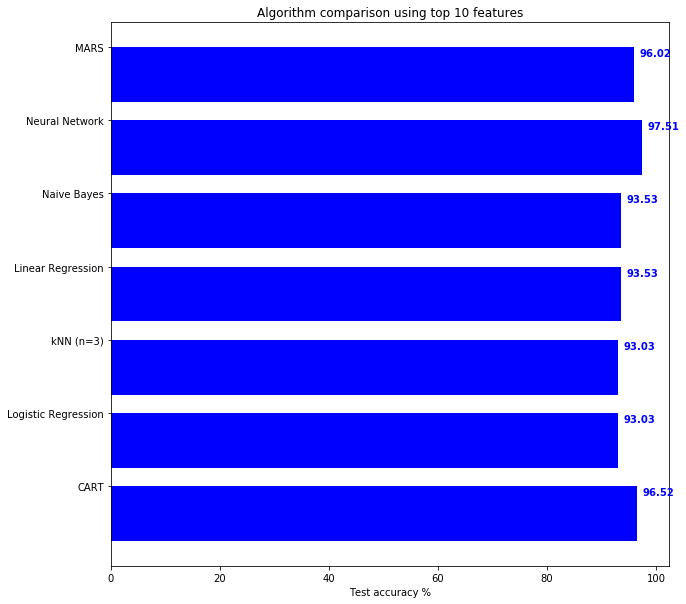

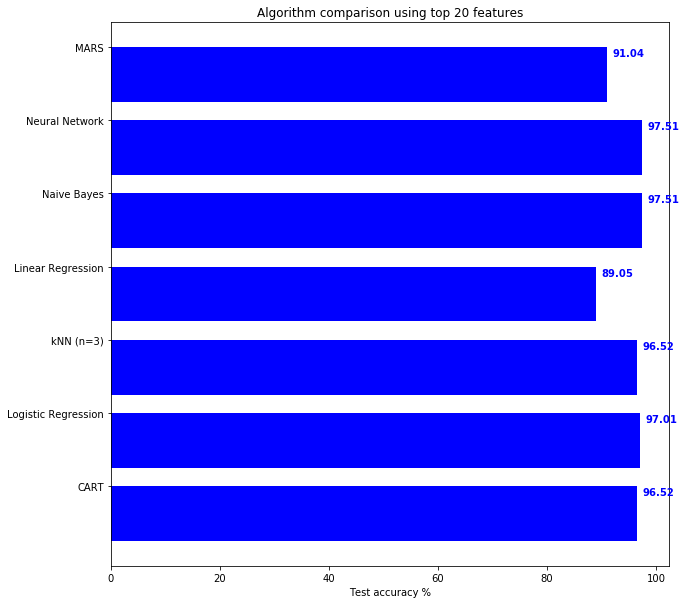

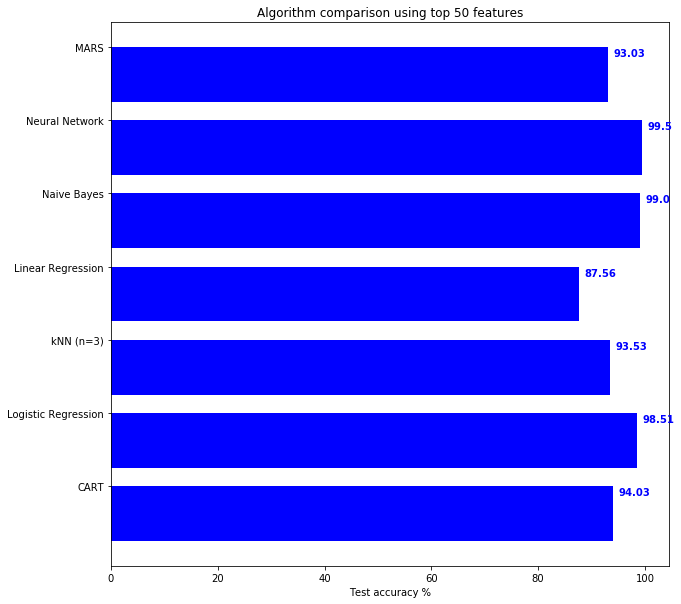

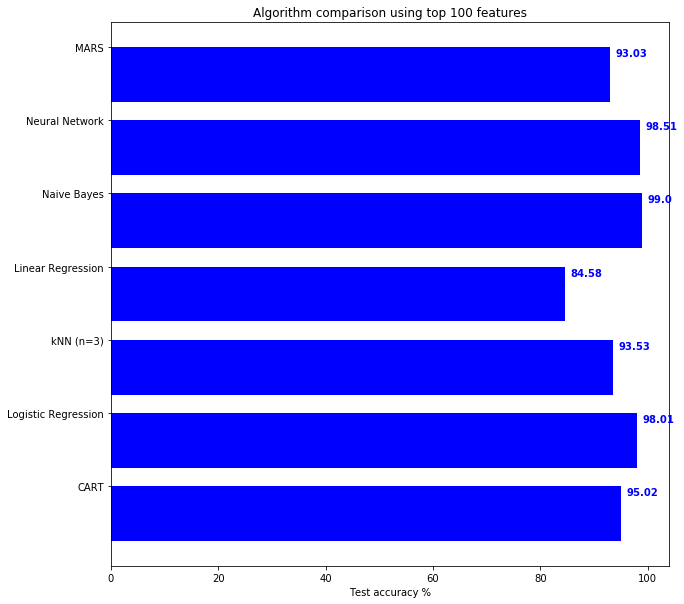

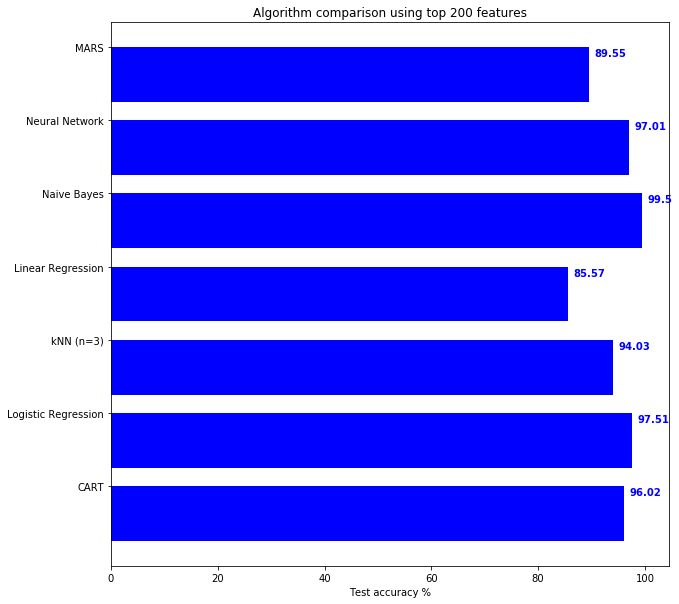

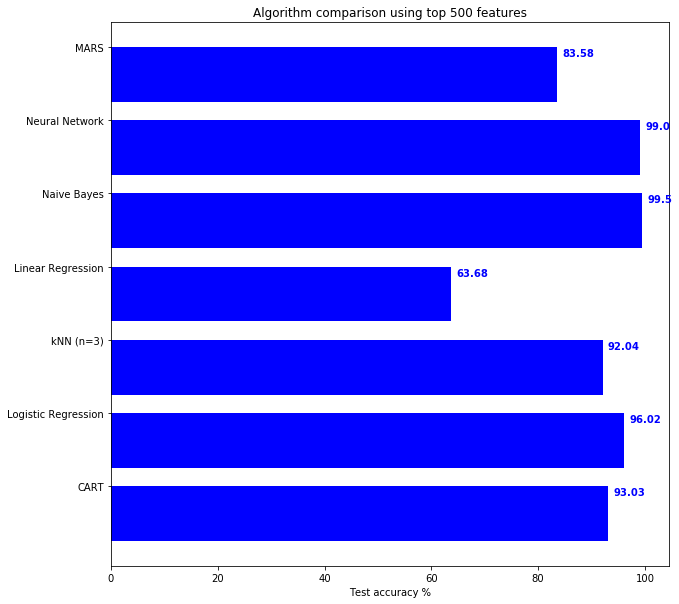

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from pyearth import Earth
from sklearn.neural_network import MLPClassifier

import os
import numpy as np
import matplotlib.pyplot as plt



for T in [10,20,50,100,200,500]:

    #TOP T FEATURES
    top=SignificantWords.loc['smartSignificance'].sort_values(ascending=False)[0:T]
    newtestfrequencies=testfrequencies[top.keys()]
    newtrainfrequencies=trainfrequencies[top.keys()]

    #x_train  y_train
    x_train=np.array(newtrainfrequencies)
    y_train=y_train #just for aesthetics

    #x_test  y_test
    x_test=np.array(newtestfrequencies)
    y_test=y_test #just for aesthetics

    scores=[] #we will save accuracies here
    names=[] #we will save algorithm names here

    #CART
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100)
    clf_gini.fit(x_train, y_train)
    y_pred = clf_gini.predict(x_test)
    clf_gini_accuracy_score = accuracy_score(y_test,y_pred)
    scores.append(clf_gini_accuracy_score)
    names.append("CART")

    #Logistic Regression 
    Spam_model = LogisticRegression(solver='liblinear', penalty='l1')
    Spam_model.fit(x_train, y_train)
    pred = Spam_model.predict(x_test)
    logistic_regr_accuracy_score=accuracy_score(y_test,pred)
    scores.append(logistic_regr_accuracy_score)
    names.append("Logistic Regression")

    #kNN
    Spam_model = KNeighborsClassifier(n_neighbors=3)
    Spam_model.fit(x_train, y_train)
    pred = Spam_model.predict(x_test)
    knn_accuracy_score=accuracy_score(y_test,pred)
    scores.append(knn_accuracy_score)
    names.append("kNN (n=3)")

    #Linear Regression
    y_train_numeric=pd.DataFrame(y_train)
    y_test_numeric=pd.DataFrame(y_test)
    mapping = {'spam': 1, 'ham': 0}
    y_train_numeric=y_train_numeric.applymap(lambda s: mapping.get(s) if s in mapping else s)
    y_test_numeric=y_test_numeric.applymap(lambda s: mapping.get(s) if s in mapping else s)
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train_numeric)
    y_pred = regr.predict(x_test)
    y_pred=np.where(y_pred>=0.5, 1, y_pred)
    y_pred=np.where(y_pred<0.5, 0, y_pred)
    linear_regr_accuracy_score=accuracy_score(y_test_numeric,y_pred)
    scores.append(linear_regr_accuracy_score)
    names.append("Linear Regression")

    #Naive Bayes
    classifier = MultinomialNB()
    classifier.fit(x_train,y_train)
    predictions=classifier.predict(x_test)
    naive_bayes_accuracy_score=accuracy_score(y_test,predictions)
    scores.append(naive_bayes_accuracy_score)
    names.append("Naive Bayes")
    
    #Neural Network
    dnn = MLPClassifier(hidden_layer_sizes=(3), activation='logistic',alpha=1e-05, learning_rate_init=0.1, max_iter=100)
    dnn.fit(x_train, y_train)
    pred = dnn.predict(x_test)
    dnn_accuracy_score = accuracy_score(y_test, pred)
    scores.append(dnn_accuracy_score)
    names.append("Neural Network")

    #MARS
    model = Earth(verbose=False) # initializing py- earth package
    model.fit(x_train, y_train_numeric)
    y_pred = model.predict(x_test)
    y_pred=np.where(y_pred>=0.5, 1, y_pred)
    y_pred=np.where(y_pred<0.5, 0, y_pred)
    mars_accuracy_score=accuracy_score(y_test_numeric,y_pred)
    scores.append(mars_accuracy_score)
    names.append("MARS")
    

    #PLOTTING
    x = names
    #y = scores
    y = [i * 100 for i in scores]
    y = [ '%.2f' % elem for elem in y ]
    y = [float(i) for i in y]


    fig, ax = plt.subplots(figsize=(10,10))    
    width = 0.75 # the width of the bars 
    ind = np.arange(len(y))  # the x locations for the groups
    ax.barh(ind, y, width, color="blue")
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(x, minor=False)
    title='Algorithm comparison using top '+ str(T) +' features'
    plt.title(title)
    plt.xlabel('Test accuracy %')
    plt.ylabel('')

    for i, v in enumerate(y):
        ax.text(v + 1, i + .25, str(v), color='blue', fontweight='bold')
    #plt.show()


# Observations

* We observe that for a small number of features, all algorithms are pretty good but CART and Neural Networks perform better.
* As we increase the number of features MARS, Linear Regression and kNN lose a lot of accuracy, Neural Networks and Logistic Regression increase their accuracy and CART remains relatively the same.